In [9]:
#%%

import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile
from tqdm import tqdm
import cv2
import tensorflow as tf
from pandas import read_csv
tqdm().pandas()


#%%


#range of images

min = 100
max = 105


root_path = "/home/saad/DOTA_devkit/"

df = pd.DataFrame()
df = read_csv(root_path + 'train_annotation.txt',names=['image-name', 'x1', 'y1', 'x2', 'y2', 'class'],na_values=['.'])
#print(df)


#%%

img_data_single_names = pd.DataFrame()

data = df[['image-name']]
#print(data.loc[1])

temp = ""

for index, row in data.loc[min:max].iterrows():
    img_name_1 = row['image-name']
    #print(img_name_1)

    if temp == img_name_1:
        continue
    else:
        #print(img_name_1)
        img_data_single_names = img_data_single_names.append( {'image-name':img_name_1},ignore_index=True )
        temp = img_name_1

print( img_data_single_names.head() )




0it [00:00, ?it/s]

                  image-name
0  P1399__1__2772___1848.png
1    P0777__1__585___334.png
2        P0123__1__0___0.png
3   P2027__1__128___1152.png
4       P0730__1__0___74.png


(1024, 1024, 3)
                       image-name     x1      y1     x2      y2  class
100     P1399__1__2772___1848.png  165.0   241.0  839.0   928.0  plane
1595    P1399__1__2772___1848.png  128.0   228.0   89.0   150.0  plane
2098    P1399__1__2772___1848.png  359.0   436.0  736.0   822.0  plane
10263   P1399__1__2772___1848.png  349.0   426.0  935.0  1024.0  plane
17831   P1399__1__2772___1848.png   88.0   195.0  417.0   479.0  plane
20844   P1399__1__2772___1848.png   95.0   206.0  232.0   288.0  plane
36659   P1399__1__2772___1848.png  672.0   759.0  812.0   903.0  plane
57141   P1399__1__2772___1848.png  117.0   232.0  270.0   335.0  plane
63665   P1399__1__2772___1848.png  161.0   238.0  941.0  1024.0  plane
65517   P1399__1__2772___1848.png  680.0   762.0  695.0   784.0  plane
77352   P1399__1__2772___1848.png  409.0   485.0  794.0   876.0  plane
84158   P1399__1__2772___1848.png  104.0   207.0   46.0   100.0  plane
112490  P1399__1__2772___1848.png  118.0   228.0  371.0   430

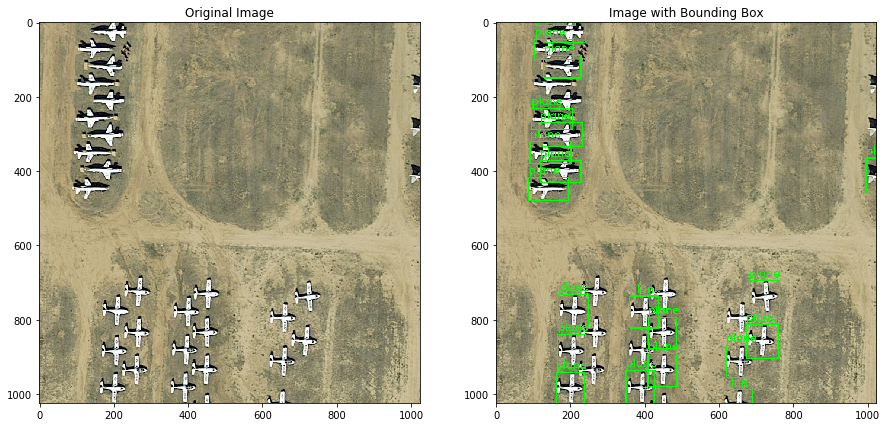

(1024, 1024, 3)
                     image-name     x1     y1     x2     y2   class
61      P0777__1__585___334.png  576.0  609.0  601.0  620.0    ship
101     P0777__1__585___334.png   34.0  181.0  103.0  470.0  harbor
2462    P0777__1__585___334.png  825.0  878.0  137.0  168.0    ship
2725    P0777__1__585___334.png   60.0  102.0  253.0  276.0    ship
2837    P0777__1__585___334.png  359.0  388.0  313.0  329.0    ship
...                         ...    ...    ...    ...    ...     ...
160225  P0777__1__585___334.png  321.0  360.0  588.0  609.0    ship
162839  P0777__1__585___334.png  538.0  579.0   82.0  104.0    ship
163275  P0777__1__585___334.png    1.0   11.0  292.0  307.0    ship
164012  P0777__1__585___334.png  238.0  266.0  291.0  308.0    ship
164910  P0777__1__585___334.png  390.0  424.0  498.0  518.0    ship

[319 rows x 6 columns]


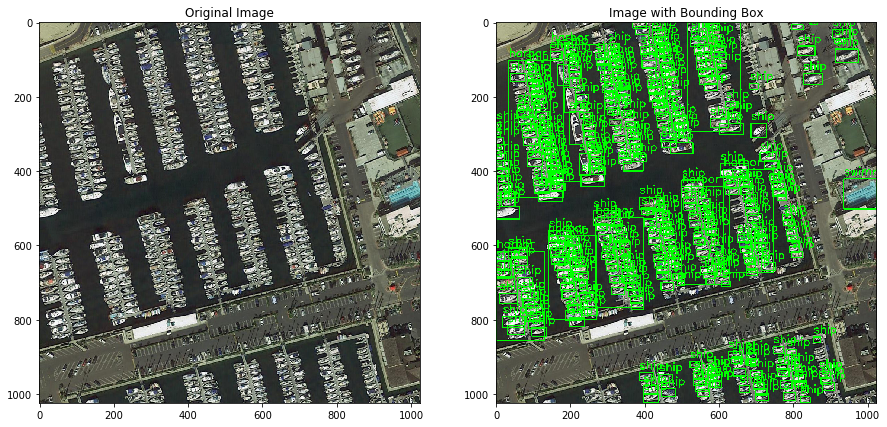

(1024, 843, 3)
                 image-name     x1     y1     x2     y2          class
102     P0123__1__0___0.png  682.0  700.0  821.0  839.0  small-vehicle
1009    P0123__1__0___0.png  447.0  467.0  683.0  699.0  small-vehicle
1805    P0123__1__0___0.png  586.0  607.0  896.0  915.0  small-vehicle
3369    P0123__1__0___0.png  657.0  670.0  544.0  565.0  small-vehicle
10999   P0123__1__0___0.png  404.0  483.0  326.0  440.0   tennis-court
...                     ...    ...    ...    ...    ...            ...
150660  P0123__1__0___0.png  588.0  606.0   69.0   79.0  small-vehicle
154749  P0123__1__0___0.png  633.0  652.0  531.0  545.0  small-vehicle
156193  P0123__1__0___0.png  110.0  129.0  122.0  132.0  small-vehicle
159127  P0123__1__0___0.png  679.0  697.0  466.0  492.0  small-vehicle
161124  P0123__1__0___0.png  607.0  628.0  879.0  898.0  small-vehicle

[82 rows x 6 columns]


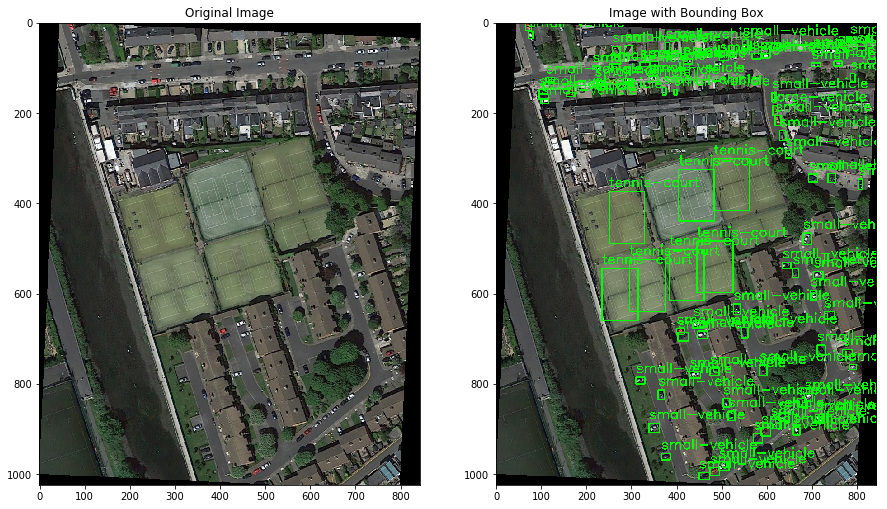

(1024, 1024, 3)
                      image-name     x1     y1     x2     y2          class
103     P2027__1__128___1152.png  376.0  408.0  395.0  491.0  large-vehicle
3357    P2027__1__128___1152.png  281.0  308.0    1.0   94.0  large-vehicle
4877    P2027__1__128___1152.png  656.0  687.0  898.0  993.0  large-vehicle
6997    P2027__1__128___1152.png  253.0  282.0    1.0   95.0  large-vehicle
7719    P2027__1__128___1152.png  348.0  377.0  496.0  589.0  large-vehicle
12731   P2027__1__128___1152.png  272.0  303.0  250.0  390.0  large-vehicle
21534   P2027__1__128___1152.png  939.0  985.0  241.0  381.0  large-vehicle
33114   P2027__1__128___1152.png  346.0  379.0  597.0  689.0  large-vehicle
39390   P2027__1__128___1152.png  887.0  938.0  247.0  387.0  large-vehicle
40702   P2027__1__128___1152.png  330.0  358.0  189.0  285.0  large-vehicle
48163   P2027__1__128___1152.png  306.0  330.0   89.0  183.0  large-vehicle
49845   P2027__1__128___1152.png   74.0   94.0  942.0  980.0  small-vehi

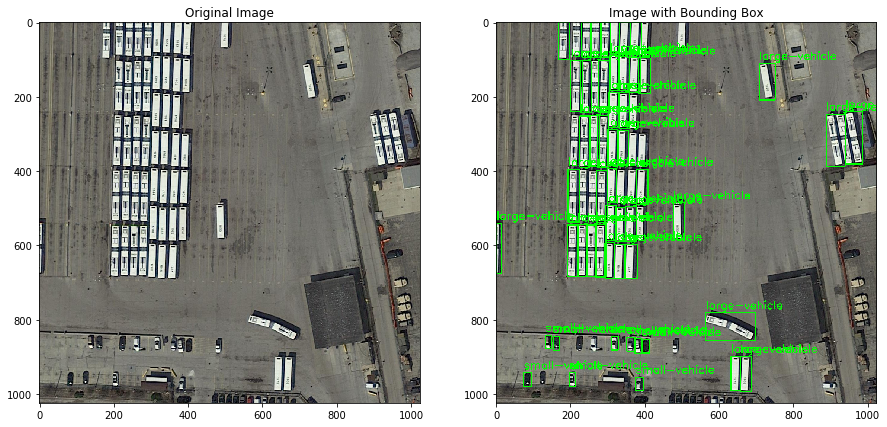

(1024, 1024, 3)
                  image-name      x1      y1     x2     y2   class
56      P0730__1__0___74.png   219.0   245.0  657.0  669.0    ship
104     P0730__1__0___74.png   727.0   771.0  532.0  553.0    ship
547     P0730__1__0___74.png   453.0   487.0  534.0  548.0    ship
705     P0730__1__0___74.png   853.0   894.0  360.0  382.0    ship
964     P0730__1__0___74.png   428.0   539.0  226.0  649.0  harbor
...                      ...     ...     ...    ...    ...     ...
160631  P0730__1__0___74.png   894.0   940.0  433.0  456.0    ship
161026  P0730__1__0___74.png   246.0   273.0  473.0  485.0    ship
161183  P0730__1__0___74.png   540.0   616.0  200.0  220.0    ship
162255  P0730__1__0___74.png   207.0   235.0  491.0  502.0    ship
164766  P0730__1__0___74.png  1017.0  1024.0  676.0  689.0    ship

[179 rows x 6 columns]


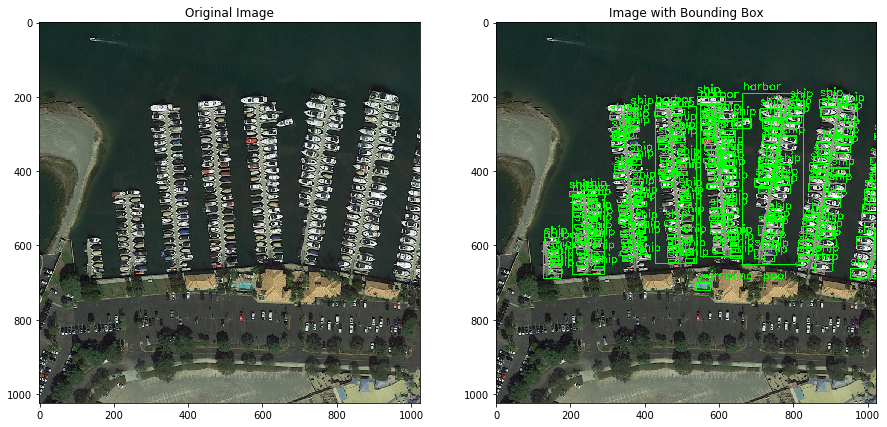

(1024, 1024, 3)
                     image-name     x1      y1      x2      y2          class
105     P1108__1__924___924.png   34.0    71.0     1.0    32.0         harbor
26522   P1108__1__924___924.png  791.0   851.0   302.0   390.0         harbor
26529   P1108__1__924___924.png  777.0   820.0   924.0   955.0  swimming-pool
41616   P1108__1__924___924.png  998.0  1024.0  1018.0  1024.0  swimming-pool
42708   P1108__1__924___924.png  253.0   294.0   113.0   173.0         harbor
44641   P1108__1__924___924.png  890.0   926.0   825.0   876.0  swimming-pool
54255   P1108__1__924___924.png  760.0   805.0   410.0   442.0  swimming-pool
80863   P1108__1__924___924.png  738.0   774.0   305.0   368.0         harbor
90648   P1108__1__924___924.png  185.0   212.0   612.0   648.0  swimming-pool
96543   P1108__1__924___924.png  316.0   375.0   132.0   210.0         harbor
99160   P1108__1__924___924.png  964.0   992.0   516.0   553.0  swimming-pool
104434  P1108__1__924___924.png  402.0   471.0  

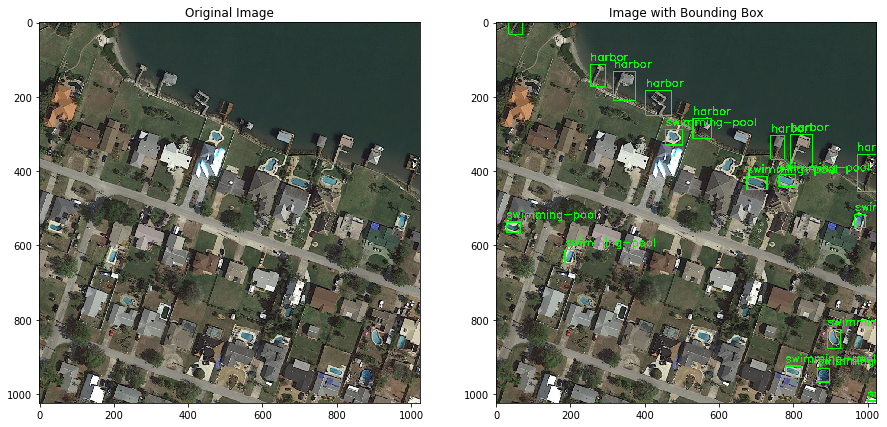

In [10]:

root_path = "/home/saad/DOTA_devkit/dota-dataset-split/"


def show_bbox_all_images(img_file):
  img = io.imread(root_path + "images/" + img_file)

  height, width, _ = img.shape
  print(img.shape)
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(img)
  img_id = img_file
  bboxs = df[ df['image-name']==img_id ]

  print(bboxs)


  img_bbox = img.copy()
  for index, row in bboxs.iterrows():
    xmin = row['x1'] / width
    xmax = row['y1'] / width
    ymin = row['x2'] / height
    ymax = row['y2'] / height
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    #label_name = row['LabelName']
    #class_series = class_descriptions[class_descriptions['name']==label_name]
    class_name = row['class']
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)
  plt.subplot(1,2,2)
  plt.title('Image with Bounding Box')
  plt.imshow(img_bbox)
  plt.show()



for index, row in img_data_single_names.iterrows():
  img_file = row['image-name']
  show_bbox_all_images(img_file)
  
